# Pokemon Challenge
## About
This project aims to predict wich pokemon would win a 1x1 battle based in their status.<br>
The project exploring the pokemon status can be found <a href='https://github.com/alcinoluiz/Pokemon-Data-Analysis'>here</a>.

### Import libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style="whitegrid")

### Import data

In [2]:
df_combats = pd.read_csv('pokemon-challenge/combats.csv')
df_pokemon = pd.read_csv('pokemon-challenge/pokemon.csv')
df_tests = pd.read_csv('pokemon-challenge/tests.csv')

### Explore data

#### Create type/color for a better visualization

In [3]:
types1 = df_pokemon['Type 1'].unique()
types1_colors = ['#7AC74C', '#EE8130', '#6390F0', '#A6B91A', 
                 '#A8A77A', '#A33EA1', '#F7D02C', '#E2BF65', '#D685AD', '#C22E28', '#F95587', '#B6A136',
                 '#735797', '#96D9D6', '#6F35FC', '#705746', '#B7B7CE', '#A98FF3'
                ]

type1_colors = {}

for i, type1 in enumerate(types1):
    type1_colors[type1] = types1_colors[i]
print(type1_colors)

{'Grass': '#7AC74C', 'Fire': '#EE8130', 'Water': '#6390F0', 'Bug': '#A6B91A', 'Normal': '#A8A77A', 'Poison': '#A33EA1', 'Electric': '#F7D02C', 'Ground': '#E2BF65', 'Fairy': '#D685AD', 'Fighting': '#C22E28', 'Psychic': '#F95587', 'Rock': '#B6A136', 'Ghost': '#735797', 'Ice': '#96D9D6', 'Dragon': '#6F35FC', 'Dark': '#705746', 'Steel': '#B7B7CE', 'Flying': '#A98FF3'}


#### Return palette

In [4]:
def get_color_by_type(dataframe):
    palette_by_name = {}
    for index, row in dataframe.iterrows():
        palette_by_name[row['Name']] = type1_colors[row['Type 1']]
    return palette_by_name

In [5]:
df_combats.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [6]:
df_combats.tail()

First_pokemon  Second_pokemon  Winner
49995            707             126     707
49996            589             664     589
49997            303             368     368
49998            109              89     109
49999              9              73       9

In [7]:
df_combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


In [8]:
df_pokemon.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [9]:
df_pokemon.tail()

#            Name   Type 1 Type 2  HP  Attack  Defense  Sp. Atk  \
795  796         Diancie     Rock  Fairy  50     100      150      100   
796  797    Mega Diancie     Rock  Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic  Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic   Dark  80     160       60      170   
799  800       Volcanion     Fire  Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  
795      150     50           6       True  
796      110    110           6       True  
797      130     70           6       True  
798      130     80           6       True  
799       90     70           6       True

In [10]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [11]:
df_tests.head()

First_pokemon  Second_pokemon
0            129             117
1            660             211
2            706             115
3            195             618
4             27             656

In [12]:
df_tests.tail()

First_pokemon  Second_pokemon
9995            216             498
9996            113             404
9997            493             104
9998            643             259
9999            678             531

#### Win/Lose by pokemon

In [13]:
wl_pkm = df_pokemon
wl_pkm = wl_pkm.set_index(['#'])
print(wl_pkm.info())
wl_pkm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB
None


Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
#                         
1           1      False  
2           1      False  
3           1      False  
4           1      False  
5           1      False

In [14]:
wl_pkm['Wins'] = 0
wl_pkm['Loses'] = 0

for i in df_combats.index:
    pk1 = df_combats.at[i, 'First_pokemon']
    pk2 =  df_combats.at[i, 'Second_pokemon']
    winner = df_combats.at[i, 'Winner']
    
    if(winner == pk1):
        wl_pkm.at[pk1, 'Wins'] += 1
        wl_pkm.at[pk2, 'Loses'] += 1
    else:
        wl_pkm.at[pk2, 'Wins'] += 1
        wl_pkm.at[pk1, 'Loses'] += 1
wl_pkm.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  Wins  Loses  
#                                      
1           1      False    37     96  
2           1      False    46     75  
3           1      False    89     43  
4           1      False    70     55  
5           1      False    55     57

In [15]:
wl_pkm.at[1, 'Name']


'Bulbasaur'

In [16]:
wl_pkm.tail()

Name   Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
796         Diancie     Rock  Fairy  50     100      150      100      150   
797    Mega Diancie     Rock  Fairy  50     160      110      160      110   
798  Hoopa Confined  Psychic  Ghost  80     110       60      150      130   
799   Hoopa Unbound  Psychic   Dark  80     160       60      170      130   
800       Volcanion     Fire  Water  80     110      120      130       90   

     Speed  Generation  Legendary  Wins  Loses  
#                                               
796     50           6       True    39     66  
797    110           6       True   116     15  
798     70           6       True    60     59  
799     80           6       True    89     55  
800     70           6       True    75     46

In [17]:
wl_pkm['Total battle'] = wl_pkm['Wins'] + wl_pkm['Loses']
wl_pkm.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  Wins  Loses  Total battle  
#                                                    
1           1      False    37     96           133  
2           1      False    46     75           121  
3           1      False    89     43           132  
4           1      False    70     55           125  
5           1      False    55     57           112

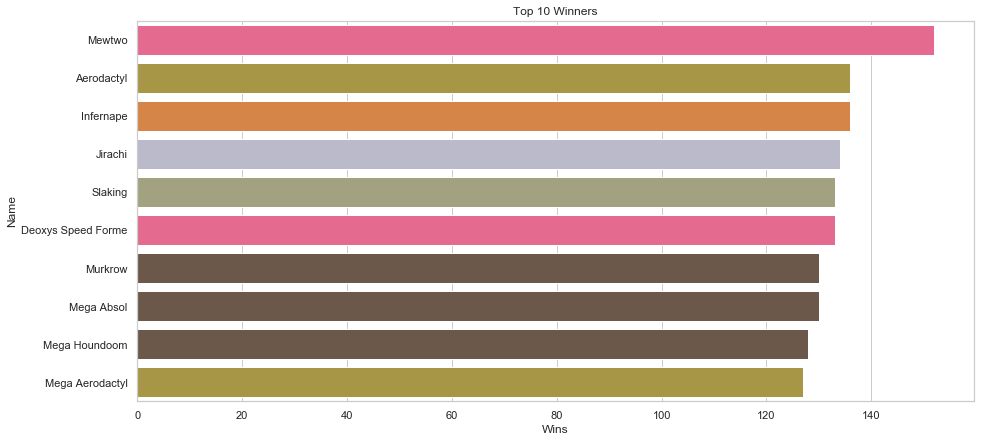

In [18]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Wins')
sns.barplot(x="Wins", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Winners');

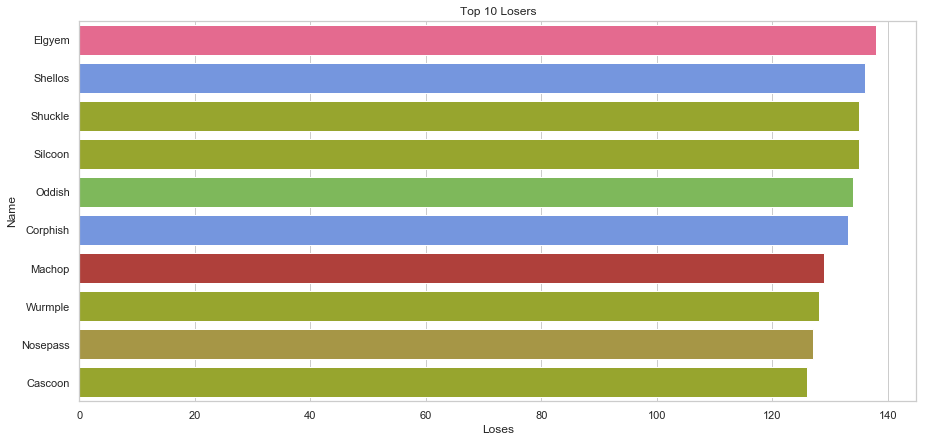

In [19]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Loses')
sns.barplot(x="Loses", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 Losers');

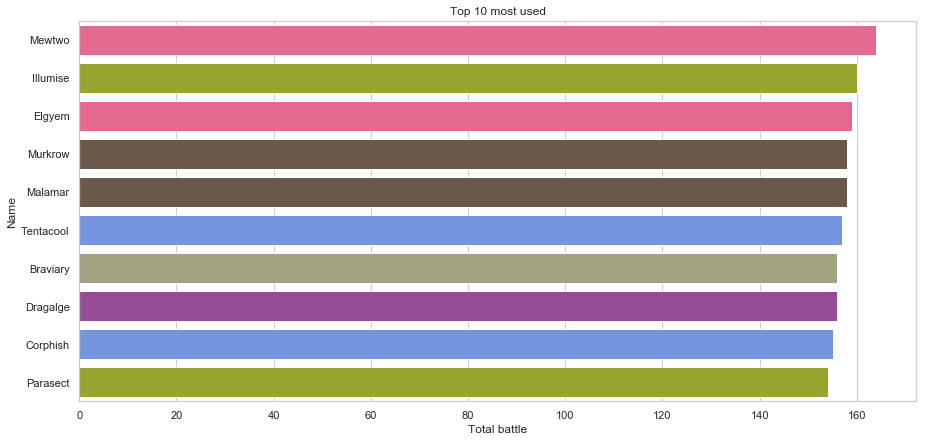

In [20]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.nlargest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 most used');

### Never used

In [21]:
wl0 = wl_pkm.loc[wl_pkm['Total battle'] == 0]
wl0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 12 to 782
Data columns (total 14 columns):
Name            16 non-null object
Type 1          16 non-null object
Type 2          8 non-null object
HP              16 non-null int64
Attack          16 non-null int64
Defense         16 non-null int64
Sp. Atk         16 non-null int64
Sp. Def         16 non-null int64
Speed           16 non-null int64
Generation      16 non-null int64
Legendary       16 non-null bool
Wins            16 non-null int64
Loses           16 non-null int64
Total battle    16 non-null int64
dtypes: bool(1), int64(10), object(3)
memory usage: 1.8+ KB


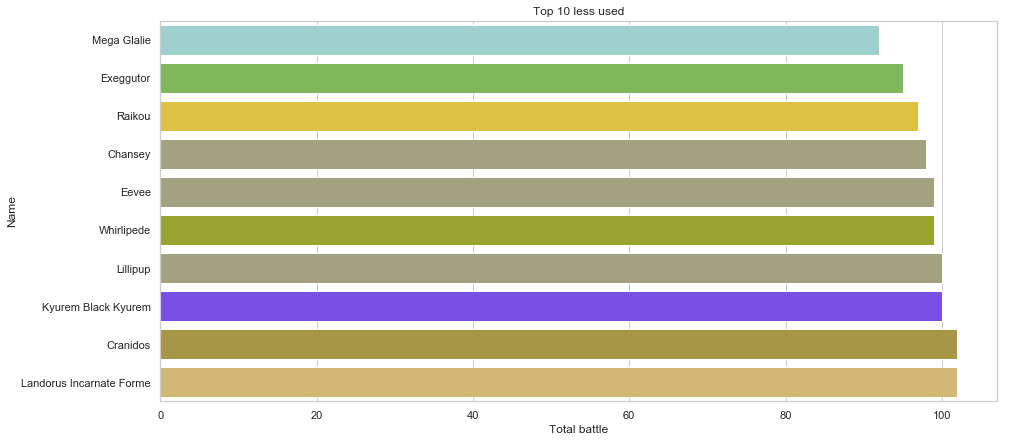

In [22]:
f, ax = plt.subplots(figsize=(15, 7))
data = wl_pkm.loc[wl_pkm['Total battle'] > 0].nsmallest(10, 'Total battle')
sns.barplot(x="Total battle", y='Name', data=data, palette=get_color_by_type(data)).set_title('Top 10 less used');


In [23]:
wl0

Name    Type 1   Type 2   HP  Attack  Defense  Sp. Atk  \
#                                                                             
12              Blastoise     Water      NaN   79      83      100       85   
33              Sandshrew    Ground      NaN   50      75       85       20   
46             Wigglytuff    Normal    Fairy  140      70       45       85   
66                Poliwag     Water      NaN   40      50       40       40   
78             Victreebel     Grass   Poison   80     105       65      100   
90               Magneton  Electric    Steel   50      60       95      120   
144                 Ditto    Normal      NaN   48      48       48       48   
183               Ariados       Bug   Poison   70      90       70       60   
236              Ursaring    Normal      NaN   90     130       75       75   
322              Hariyama  Fighting      NaN  144     120       60       40   
419           Mega Latias    Dragon  Psychic   80     100      120      140   
479             Honchkrow      Dark   Flying  100     125       52      105   
556               Servine     Grass      NaN   60      60       75       60   
618              Maractus     Grass      NaN   75      86       67      106   
655             Jellicent     Water    Ghost  100      60       70       85   
782  Pumpkaboo Small Size     Ghost    Grass   44      66       70       44   

     Sp. Def  Speed  Generation  Legendary  Wins  Loses  Total battle  
#                                                                      
12       105     78           1      False     0      0             0  
33        30     40           1      False     0      0             0  
46        50     45           1      False     0      0             0  
66        40     90           1      False     0      0             0  
78        70     70           1      False     0      0             0  
90        70     70           1      False     0      0             0  
144       48     48           1      False     0      0             0  
183       60     40           2      False     0      0             0  
236       75     55           2      False     0      0             0  
322       60     50           3      False     0      0             0  
419      150    110           3       True     0      0             0  
479       52     71           4      False     0      0             0  
556       75     83           5      False     0      0             0  
618       67     60           5      False     0      0             0  
655      105     60           5      False     0      0             0  
782       55     56           6      False     0      0             0

/home/flatline/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


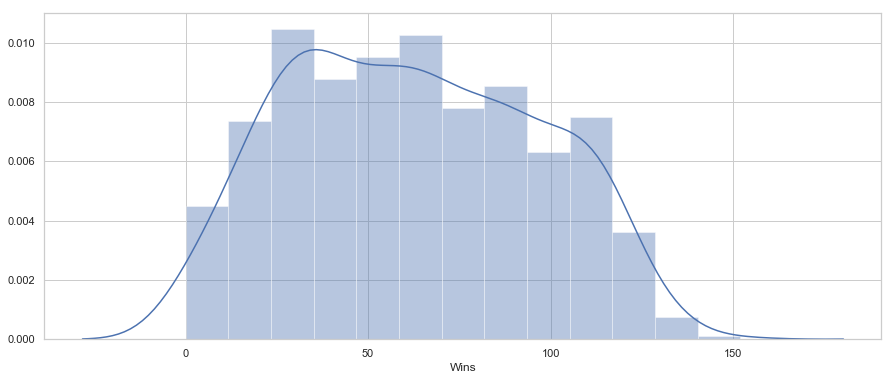

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(wl_pkm.Wins);

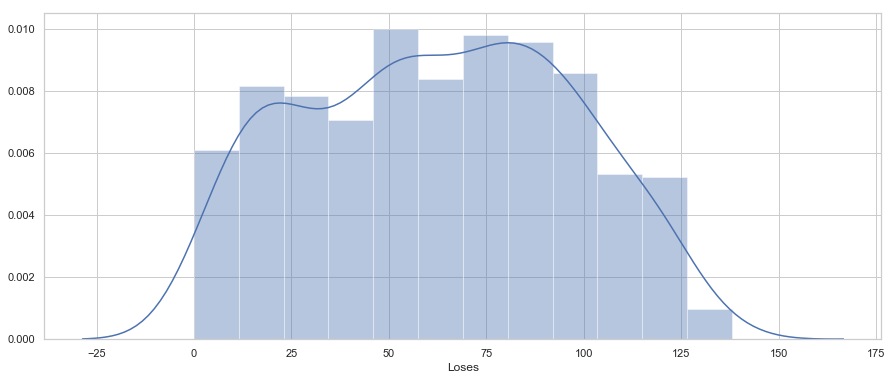

In [25]:
f, ax = plt.subplots(figsize=(15, 6))
sns.distplot(wl_pkm.Loses);

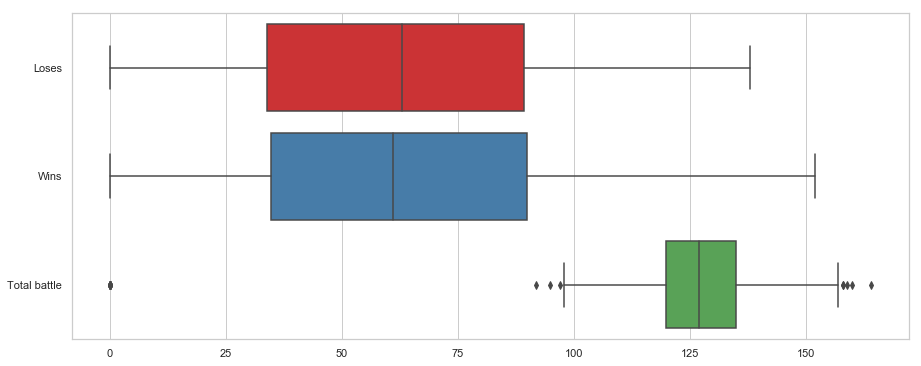

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=wl_pkm[['Loses','Wins','Total battle']], palette="Set1", orient='h')

#### Total battle by types

In [27]:
wl_pkm.groupby(['Type 1']).sum()[['Wins', 'Loses', 'Total battle']]

Wins  Loses  Total battle
Type 1                             
Bug       3772   4988          8760
Dark      2447   1398          3845
Dragon    2490   1442          3932
Electric  3370   1976          5346
Fairy      707   1444          2151
Fighting  1543   1763          3306
Fire      3802   2750          6552
Flying     362    116           478
Ghost     1877   2031          3908
Grass     3707   4719          8426
Ground    2088   1801          3889
Ice       1357   1722          3079
Normal    6518   5580         12098
Poison    1571   2083          3654
Psychic   3998   3322          7320
Rock      2299   3370          5669
Steel     1523   2023          3546
Water     6569   7472         14041

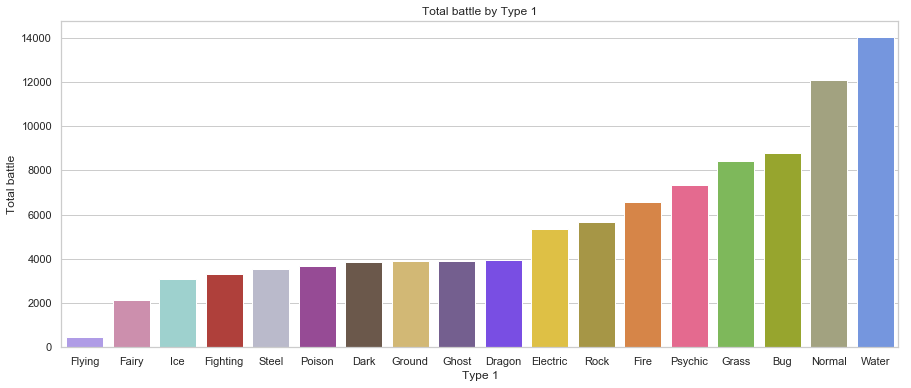

In [28]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 1', y="Total battle", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total battle by Type 1');

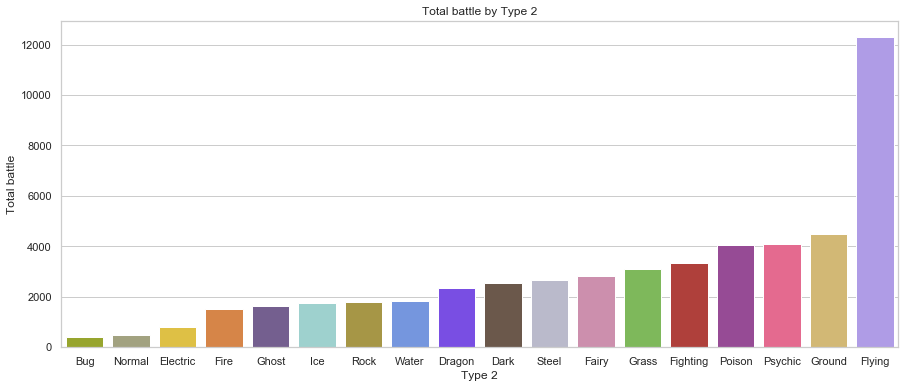

In [29]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.barplot(x='Type 2', y="Total battle", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total battle by Type 2');

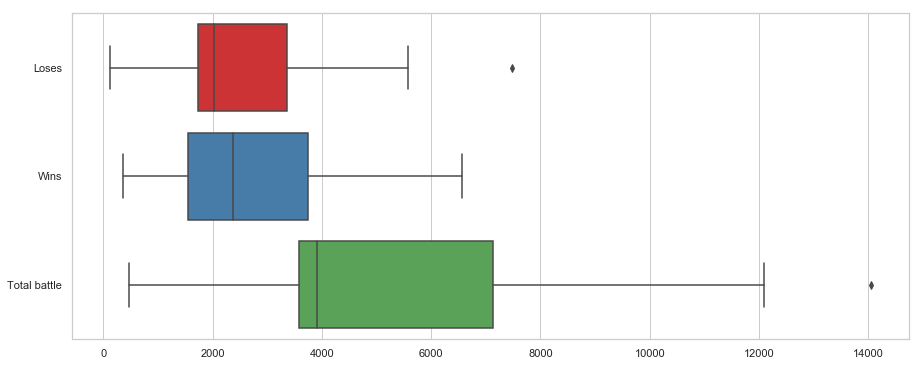

In [30]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Total battle'])

sns.boxplot(data=data[['Loses','Wins','Total battle']], palette="Set1", orient='h');

I think that <b>Total battle X Type</b> do not aggregate too much information because (most of) common types are the most used as well. <br>
Let's try <b>Type X Wins</b> and <b>Type X Loses</b>

#### Win by types

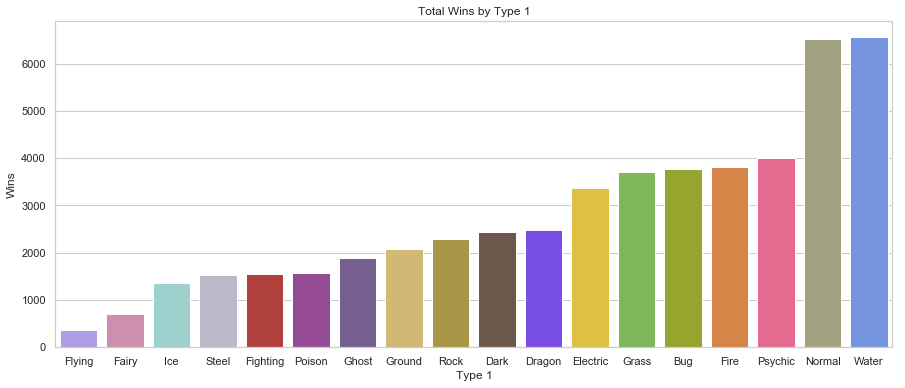

In [31]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 1', y="Wins", data=data, palette=type1_colors, order=order['Type 1']).set_title('Total Wins by Type 1');

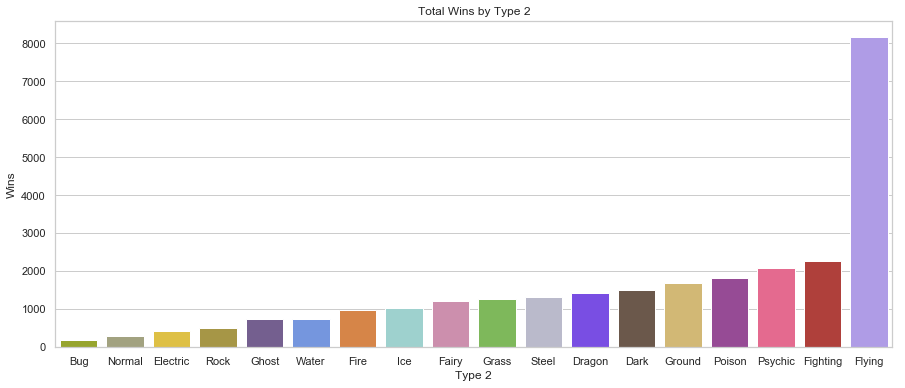

In [32]:
f, ax = plt.subplots(figsize=(15, 6))

data = wl_pkm.groupby(['Type 2'], as_index=False).sum()
order = data.sort_values(ascending=True, by=['Wins'])

sns.barplot(x='Type 2', y="Wins", data=data, palette=type1_colors, order=order['Type 2']).set_title('Total Wins by Type 2');

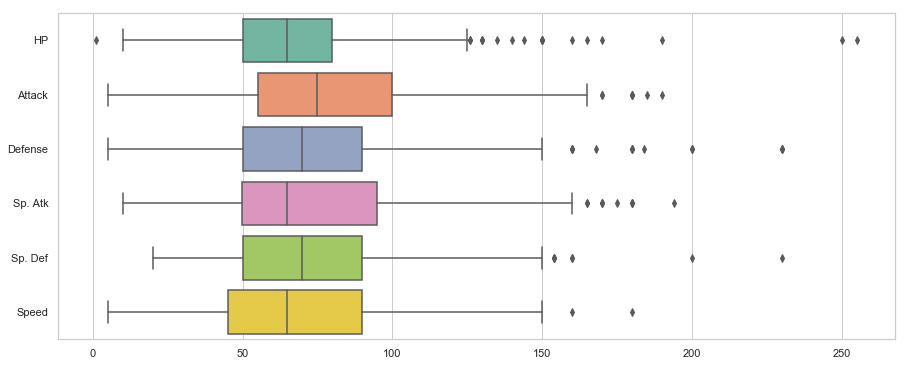

In [33]:
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=wl_pkm[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], palette="Set2", orient='h');

In [34]:
# Melt DataFrame
melted_df = pd.melt(wl_pkm[["Name", "Type 1", "Type 2", 'HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']], 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0      Bulbasaur  Grass  Poison   HP     45
1        Ivysaur  Grass  Poison   HP     60
2       Venusaur  Grass  Poison   HP     80
3  Mega Venusaur  Grass  Poison   HP     80
4     Charmander   Fire     NaN   HP     39

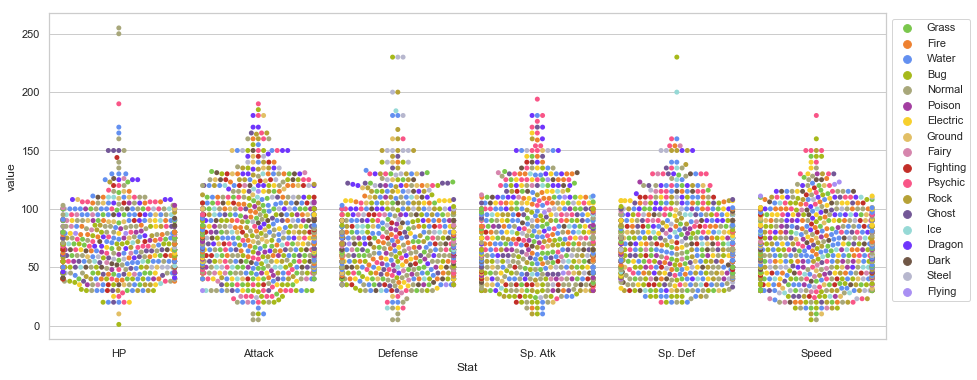

In [35]:
f, ax = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', palette=type1_colors)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

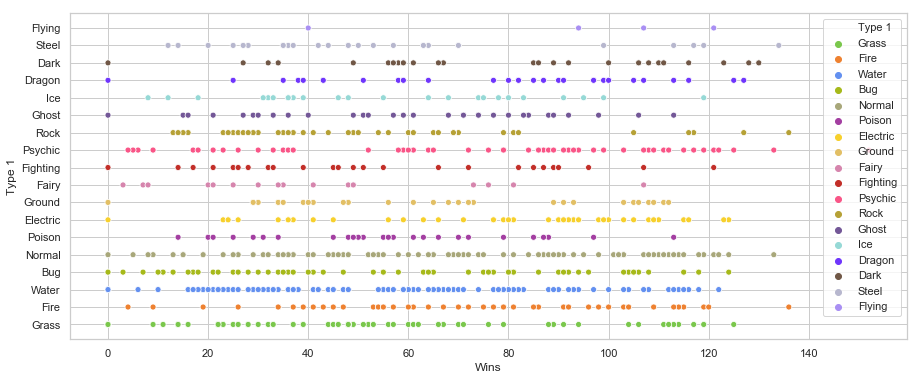

In [36]:
# data = wl_pkm.groupby(['Type 1'], as_index=False).sum()
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))
# ax.scatter(data['Type 1'], data['Wins'], alpha=0.3, edgecolors='none')

# ax.legend()
# ax.grid(True)
# plt.show();

sns.scatterplot(y="Type 1", x="Wins", hue="Type 1", data=data, palette=type1_colors)

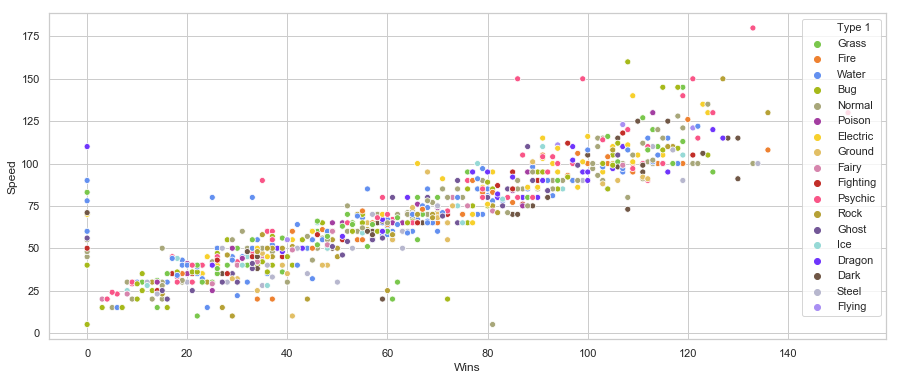

In [37]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Speed", x="Wins", hue="Type 1", data=data, palette=type1_colors)

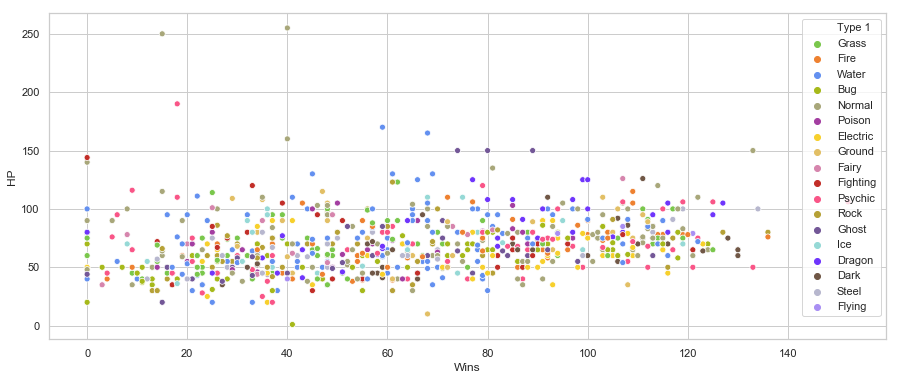

In [38]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="HP", x="Wins", hue="Type 1", data=data, palette=type1_colors)

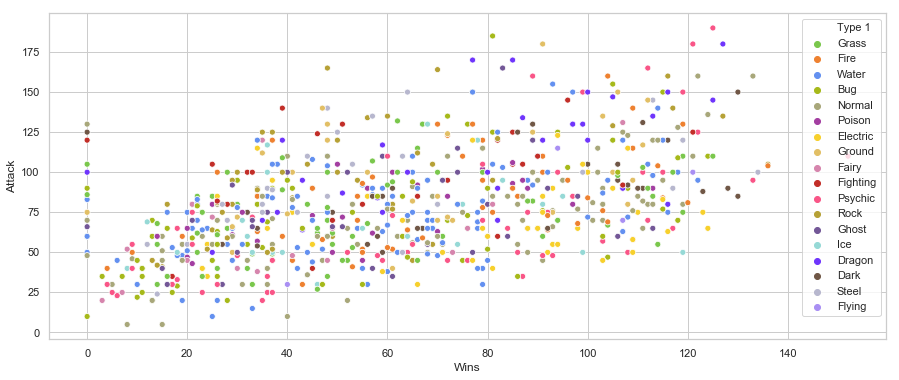

In [39]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Attack", x="Wins", hue="Type 1", data=data, palette=type1_colors)

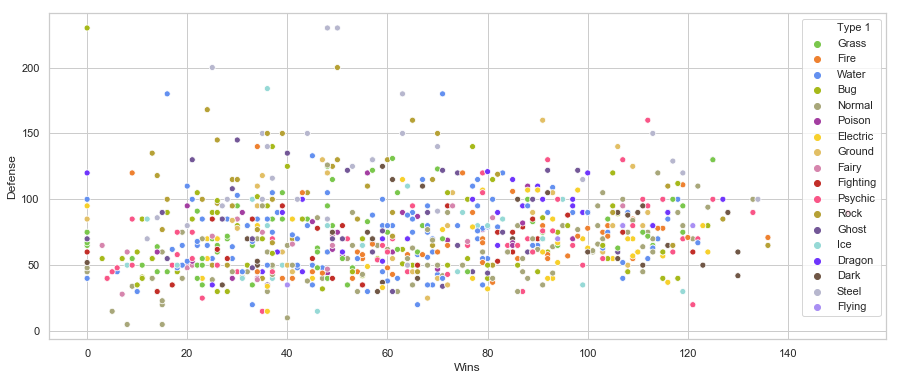

In [40]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Defense", x="Wins", hue="Type 1", data=data, palette=type1_colors)

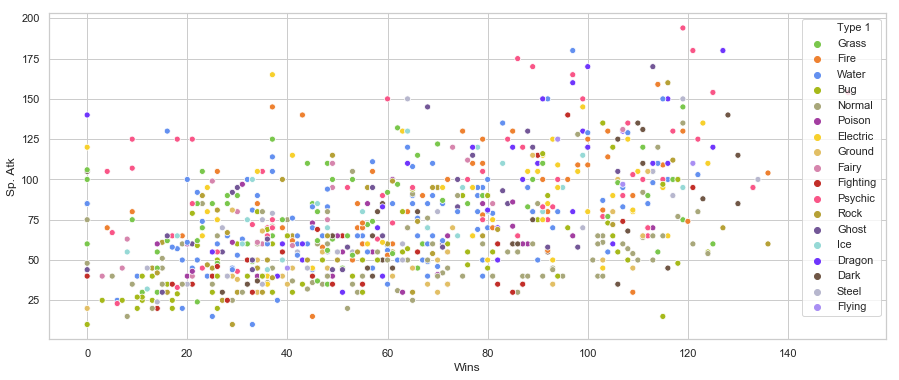

In [41]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Sp. Atk", x="Wins", hue="Type 1", data=data, palette=type1_colors)

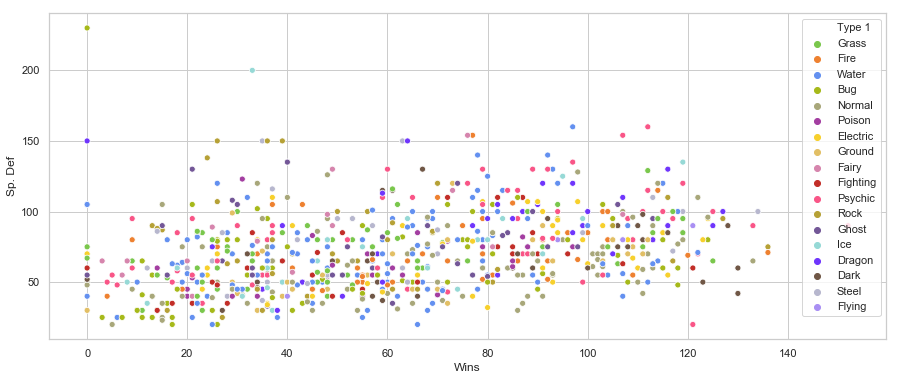

In [42]:
data = wl_pkm

f, ax = plt.subplots(figsize=(15, 6))

sns.scatterplot(y="Sp. Def", x="Wins", hue="Type 1", data=data, palette=type1_colors)

In [43]:
corr_cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Wins', 'Loses']
wl_pkm[corr_cols].corr(method='pearson')[['Wins', 'Loses']]

Wins     Loses
HP       0.237030 -0.259229
Attack   0.479151 -0.464690
Defense  0.125996 -0.082763
Sp. Atk  0.451729 -0.450815
Sp. Def  0.295788 -0.273137
Speed    0.887872 -0.880949
Wins     1.000000 -0.807633
Loses   -0.807633  1.000000

In [44]:
wl_pkm[corr_cols].corr(method='spearman')[['Wins', 'Loses']]

Wins     Loses
HP       0.328870 -0.333434
Attack   0.477560 -0.463808
Defense  0.190476 -0.159220
Sp. Atk  0.445637 -0.446872
Sp. Def  0.356149 -0.324255
Speed    0.910114 -0.905256
Wins     1.000000 -0.831731
Loses   -0.831731  1.000000

In [45]:
wl_pkm[corr_cols].corr(method='kendall')[['Wins', 'Loses']]

Wins     Loses
HP       0.226487 -0.226598
Attack   0.333986 -0.320218
Defense  0.128620 -0.106106
Sp. Atk  0.315692 -0.314562
Sp. Def  0.243490 -0.219746
Speed    0.775618 -0.780667
Wins     1.000000 -0.724975
Loses   -0.724975  1.000000

In [46]:
wl_pkm_type_atk = wl_pkm.copy()

<hr>

### Prepare data

In [47]:
# Fix Pokemon name null - Pokemon after Mankey = Primeape
wl_pkm.loc[wl_pkm["Name"].isna(), "Name"] = "Primeape"
wl_pkm.loc[63]

Name            Primeape
Type 1          Fighting
Type 2               NaN
HP                    65
Attack               105
Defense               60
Sp. Atk               60
Sp. Def               70
Speed                 95
Generation             1
Legendary          False
Wins                  85
Loses                 23
Total battle         108
Name: 63, dtype: object

In [48]:
wl_pkm['Mega'] = 0
wl_pkm.loc[wl_pkm.Name.str.contains(pat = 'Mega '), 'Mega'] = 1

wl_pkm.loc[wl_pkm.Legendary == False, 'Legendary'] = 0
wl_pkm.loc[wl_pkm.Legendary == True, 'Legendary'] = 1

In [49]:
wl_pkm.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  Wins  Loses  Total battle  Mega  
#                                                          
1           1          0    37     96           133     0  
2           1          0    46     75           121     0  
3           1          0    89     43           132     0  
4           1          0    70     55           125     1  
5           1          0    55     57           112     0

In [50]:
wl_pkm.loc[wl_pkm.Legendary == 1].head()

Name    Type 1    Type 2   HP  Attack  Defense  Sp. Atk  \
#                                                                       
157       Articuno       Ice    Flying   90      85      100       95   
158         Zapdos  Electric    Flying   90      90       85      125   
159        Moltres      Fire    Flying   90     100       90      125   
163         Mewtwo   Psychic       NaN  106     110       90      154   
164  Mega Mewtwo X   Psychic  Fighting  106     190      100      154   

     Sp. Def  Speed  Generation  Legendary  Wins  Loses  Total battle  Mega  
#                                                                            
157      125     85           1          1    95     44           139     0  
158       90    100           1          1    93     28           121     0  
159       85     90           1          1   100     36           136     0  
163       90    130           1          1   152     12           164     0  
164      100    130           1          1   125     10           135     1

In [51]:
wl_pkm.loc[wl_pkm.Name.str.contains(pat = 'Mega ')].head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
4      Mega Venusaur  Grass  Poison  80     100      123      122      120   
8   Mega Charizard X   Fire  Dragon  78     130      111      130       85   
9   Mega Charizard Y   Fire  Flying  78     104       78      159      115   
13    Mega Blastoise  Water     NaN  79     103      120      135      115   
20     Mega Beedrill    Bug  Poison  65     150       40       15       80   

    Speed  Generation  Legendary  Wins  Loses  Total battle  Mega  
#                                                                  
4      80           1          0    70     55           125     1  
8     100           1          0   119     20           139     1  
9     100           1          0   114     21           135     1  
13     78           1          0    83     61           144     1  
20    145           1          0   115      4           119     1

In [52]:
# wl_pkm = pd.get_dummies(wl_pkm, columns=['Legendary', 'Mega'])

In [53]:
wl_pkm.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
#                                                                               
1      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
2        Ivysaur  Grass  Poison  60      62       63       80       80     60   
3       Venusaur  Grass  Poison  80      82       83      100      100     80   
4  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
5     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  Wins  Loses  Total battle  Mega  
#                                                          
1           1          0    37     96           133     0  
2           1          0    46     75           121     0  
3           1          0    89     43           132     0  
4           1          0    70     55           125     1  
5           1          0    55     57           112     0

In [54]:
cbt = df_combats
cbt = cbt.rename(index=str, columns={"First_pokemon": "pk1", "Second_pokemon": "pk2"})
cbt.drop_duplicates(inplace=True)
cbt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48048 entries, 0 to 49999
Data columns (total 3 columns):
pk1       48048 non-null int64
pk2       48048 non-null int64
Winner    48048 non-null int64
dtypes: int64(3)
memory usage: 1.5+ MB


In [55]:
cbt.head()

pk1  pk2  Winner
0  266  298     298
1  702  701     701
2  191  668     668
3  237  683     683
4  151  231     151

In [56]:
# pk_cols = ['pk1_HP', 'pk1_Attack', 'pk1_Defense', 'pk1_Sp. Atk', 'pk1_Sp. Def', 'pk1_Speed','pk2_HP', 'pk2_Attack', 'pk2_Defense', 'pk2_Sp. Atk', 'pk2_Sp. Def', 'pk2_Speed', 'pk1_Mega', 'pk1_Legendary' ,'pk2_Mega', 'pk2_Legendary']
pk_cols = [
    'pk1_HP','pk1_Attack','pk1_Defense','pk1_Sp. Atk','pk1_Sp. Def',
    'pk1_Speed','pk2_HP','pk2_Attack','pk2_Defense','pk2_Sp. Atk',
    'pk2_Sp. Def','pk2_Speed','pk1_Mega','pk1_Legendary','pk2_Mega','pk2_Legendary',
    'P1T1xP2T1', 'P1T1xP2T2', 'P1T2xP2T1', 'P1T2xP2T2', 'P2T1xP1T1', 'P2T1xP1T2', 'P2T2xP1T1', 'P2T2xP1T2'
]
for col in pk_cols:
    cbt[col] = 0

cbt.head()

pk1  pk2  Winner  pk1_HP  pk1_Attack  pk1_Defense  pk1_Sp. Atk  \
0  266  298     298       0           0            0            0   
1  702  701     701       0           0            0            0   
2  191  668     668       0           0            0            0   
3  237  683     683       0           0            0            0   
4  151  231     151       0           0            0            0   

   pk1_Sp. Def  pk1_Speed  pk2_HP    ...      pk2_Mega  pk2_Legendary  \
0            0          0       0    ...             0              0   
1            0          0       0    ...             0              0   
2            0          0       0    ...             0              0   
3            0          0       0    ...             0              0   
4            0          0       0    ...             0              0   

   P1T1xP2T1  P1T1xP2T2  P1T2xP2T1  P1T2xP2T2  P2T1xP1T1  P2T1xP1T2  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   P2T2xP1T1  P2T2xP1T2  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 27 columns]

#### Type X Type

In [57]:
type_chart = pd.read_csv('chart-type.csv')

type_chart.set_index(['DEFENSE – ATTACK'], inplace=True)

type_chart.head()

Normal  Fire  Water  Electric  Grass  Ice  Fighting  Poison  \
DEFENSE – ATTACK                                                                
Normal                 1   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
Fire                   1   0.5    0.5       1.0    2.0  2.0       1.0     1.0   
Water                  1   2.0    0.5       1.0    0.5  1.0       1.0     1.0   
Electric               1   1.0    2.0       0.5    0.5  1.0       1.0     1.0   
Grass                  1   0.5    2.0       1.0    0.5  1.0       1.0     0.5   

                  Ground  Flying  Psychic  Bug  Rock  Ghost  Dragon  Dark  \
DEFENSE – ATTACK                                                            
Normal               1.0     1.0      1.0  1.0   0.5    0.0     1.0   1.0   
Fire                 1.0     1.0      1.0  2.0   0.5    1.0     0.5   1.0   
Water                2.0     1.0      1.0  1.0   2.0    1.0     0.5   1.0   
Electric             0.0     2.0      1.0  1.0   1.0    1.0     0.5   1.0   
Grass                2.0     0.5      1.0  0.5   2.0    1.0     0.5   1.0   

                  Steel  Fairy  
DEFENSE – ATTACK                
Normal              0.5    1.0  
Fire                2.0    1.0  
Water               1.0    1.0  
Electric            1.0    1.0  
Grass               0.5    1.0

In [58]:
type_chart.tail()

Normal  Fire  Water  Electric  Grass  Ice  Fighting  Poison  \
DEFENSE – ATTACK                                                                
Ghost                  0   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
Dragon                 1   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
Dark                   1   1.0    1.0       1.0    1.0  1.0       0.5     1.0   
Steel                  1   0.5    0.5       0.5    1.0  2.0       1.0     1.0   
Fairy                  1   0.5    1.0       1.0    1.0  1.0       2.0     0.5   

                  Ground  Flying  Psychic  Bug  Rock  Ghost  Dragon  Dark  \
DEFENSE – ATTACK                                                            
Ghost                1.0     1.0      2.0  1.0   1.0    2.0     1.0   0.5   
Dragon               1.0     1.0      1.0  1.0   1.0    1.0     2.0   1.0   
Dark                 1.0     1.0      2.0  1.0   1.0    2.0     1.0   0.5   
Steel                1.0     1.0      1.0  1.0   2.0    1.0     1.0   1.0   
Fairy                1.0     1.0      1.0  1.0   1.0    1.0     2.0   2.0   

                  Steel  Fairy  
DEFENSE – ATTACK                
Ghost               1.0    1.0  
Dragon              0.5    0.0  
Dark                1.0    0.5  
Steel               0.5    2.0  
Fairy               0.5    1.0

In [59]:
def is_nan(x):
    return (x is np.nan or x != x)

In [60]:
def type_x_type(attack, defense, df_types=type_chart):
    return 1.0 if (is_nan(attack) or is_nan(defense)) else df_types.loc[attack][defense]

In [61]:
type_x_type('Ghost', np.nan)

1.0

In [62]:
import re

In [63]:
print(re.findall(r'\d', 'P1T1xP2T1'))

['1', '1', '2', '1']


In [64]:
def get_type_x_type(col, poke_list):
    pk_attack, type_attack, pk_defense, type_defense = re.findall(r'\d', col)
    attack = poke_list[int(pk_attack)-1]['Type ' + type_attack]
    defense = poke_list[int(pk_defense)-1]['Type ' + type_defense]
    val_type = type_x_type(attack, defense)
    return val_type * poke_list[int(pk_attack)-1]['Attack'] + val_type * poke_list[int(pk_attack)-1]['Sp. Atk']

In [65]:
def set_combat_values(df_cb, df_pk, cols):
    cb = df_cb
    types_x_types_cols = [
        'P1T1xP2T1', 'P1T1xP2T2', 'P1T2xP2T1', 'P1T2xP2T2', 
        'P2T1xP1T1', 'P2T1xP1T2', 'P2T2xP1T1', 'P2T2xP1T2'
    ]
    for ix in cb.index:
        pk_num1 = cb.at[ix, 'pk1']
        pk_num2 =  cb.at[ix, 'pk2']        
        pk1 = df_pk.loc[pk_num1]
        pk2 = df_pk.loc[pk_num2]
        for c in cols:
            cb.at[ix, 'pk1_' + c] = pk1[c]
            cb.at[ix, 'pk2_' + c] = pk2[c]
        for tc in types_x_types_cols:
            effectiveness = get_type_x_type(tc, [pk1, pk2])
            cb.at[ix, tc] = effectiveness 
    return cb

In [66]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Type 1', 'Type 2', 'Legendary', 'Mega']
cbt_train = set_combat_values(cbt, wl_pkm, cols)
cbt_train.head()

pk1  pk2  Winner  pk1_HP  pk1_Attack  pk1_Defense  pk1_Sp. Atk  \
0  266  298     298      50          64           50           45   
1  702  701     701      91          90           72           90   
2  191  668     668      55          40           85           80   
3  237  683     683      40          40           40           70   
4  151  231     151      70          60          125          115   

   pk1_Sp. Def  pk1_Speed  pk2_HP     ...      P1T2xP2T1  P1T2xP2T2  \
0           50         41      70     ...             54        109   
1          129        108      91     ...            360        180   
2          105         40      75     ...            120        120   
3           40         20      77     ...            110        110   
4           70         55      20     ...            175        350   

   P2T1xP1T1  P2T1xP1T2  P2T2xP1T1  P2T2xP1T2  pk1_Type 1  pk2_Type 1  \
0        260        260        130        130        Rock       Grass   
1        201        100        201        201       Grass        Rock   
2        200        200        200        200       Fairy     Psychic   
3        180        180        180        180        Fire      Dragon   
4         20         20         20         20        Rock         Bug   

   pk1_Type 2  pk2_Type 2  
0      Ground        Dark  
1    Fighting    Fighting  
2      Flying         NaN  
3         NaN         NaN  
4       Water        Rock  

[5 rows x 31 columns]

In [67]:
cbt_train.tail()

pk1  pk2  Winner  pk1_HP  pk1_Attack  pk1_Defense  pk1_Sp. Atk  \
49994  657  681     681      50          47           50           57   
49995  707  126     707     100         120          100          150   
49996  589  664     589      60          85           40           30   
49998  109   89     109      40          30           50           55   
49999    9   73       9      78         104           78          159   

       pk1_Sp. Def  pk1_Speed  pk2_HP     ...      P1T2xP2T1  P1T2xP2T2  \
49994           50         65      45     ...            104        104   
49995          120         90      30     ...            135        270   
49996           45         68      35     ...            115        115   
49998           55        100      25     ...             85         85   
49999          115        100      70     ...            526        263   

       P2T1xP1T1  P2T1xP1T2  P2T2xP1T1  P2T2xP1T2  pk1_Type 1  pk2_Type 1  \
49994         70        140        140        140         Bug    Fighting   
49995         55        220        110        110      Dragon       Water   
49996          0        100        100        100      Ground    Electric   
49998         65        130         65        130    Electric    Electric   
49999        115         57        115        115        Fire    Fighting   

       pk1_Type 2  pk2_Type 2  
49994    Electric         NaN  
49995        Fire         NaN  
49996         NaN         NaN  
49998         NaN       Steel  
49999      Flying         NaN  

[5 rows x 31 columns]

In [68]:
cbt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48048 entries, 0 to 49999
Data columns (total 31 columns):
pk1              48048 non-null int64
pk2              48048 non-null int64
Winner           48048 non-null int64
pk1_HP           48048 non-null int64
pk1_Attack       48048 non-null int64
pk1_Defense      48048 non-null int64
pk1_Sp. Atk      48048 non-null int64
pk1_Sp. Def      48048 non-null int64
pk1_Speed        48048 non-null int64
pk2_HP           48048 non-null int64
pk2_Attack       48048 non-null int64
pk2_Defense      48048 non-null int64
pk2_Sp. Atk      48048 non-null int64
pk2_Sp. Def      48048 non-null int64
pk2_Speed        48048 non-null int64
pk1_Mega         48048 non-null int64
pk1_Legendary    48048 non-null int64
pk2_Mega         48048 non-null int64
pk2_Legendary    48048 non-null int64
P1T1xP2T1        48048 non-null int64
P1T1xP2T2        48048 non-null int64
P1T2xP2T1        48048 non-null int64
P1T2xP2T2        48048 non-null int64
P2T1xP1T1        48048

<hr>

In [69]:
wl_pkm_num_type = wl_pkm
wl_pkm_num_type['Type 1 num'] = wl_pkm_num_type['Type 1'].astype('category').cat.codes
wl_pkm_num_type['Type 2 num'] = wl_pkm_num_type['Type 2'].astype('category').cat.codes

In [70]:
cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Type 1 num', 'Type 2 num', 'Legendary', 'Mega']

In [71]:
cbt_train['Result'] = np.where(cbt_train['pk1'] == cbt_train['Winner'], 1, 2)

In [72]:
cbt_train.corr(method='pearson')[['Result']]

Result
pk1           -0.034062
pk2            0.028719
Winner         0.001218
pk1_HP        -0.141912
pk1_Attack    -0.261026
pk1_Defense   -0.055011
pk1_Sp. Atk   -0.249003
pk1_Sp. Def   -0.155195
pk1_Speed     -0.490700
pk2_HP         0.130351
pk2_Attack     0.251567
pk2_Defense    0.056560
pk2_Sp. Atk    0.243410
pk2_Sp. Def    0.153532
pk2_Speed      0.468975
pk1_Mega      -0.114656
pk1_Legendary -0.171115
pk2_Mega       0.107853
pk2_Legendary  0.164134
P1T1xP2T1     -0.248636
P1T1xP2T2     -0.218816
P1T2xP2T1     -0.231028
P1T2xP2T2     -0.275210
P2T1xP1T1      0.208508
P2T1xP1T2      0.205607
P2T2xP1T1      0.213690
P2T2xP1T2      0.265610
Result         1.000000

### Train-Test split

In [73]:
# features_names = ['pk1_HP', 'pk1_Attack', 'pk1_Defense', 'pk1_Sp. Atk', 'pk1_Sp. Def', 
#                    'pk2_HP', 'pk2_Attack', 'pk2_Defense', 'pk2_Sp. Atk', 
#                   'pk2_Sp. Def', 'pk1_Mega', 'pk1_Legendary' ,'pk2_Mega', 'pk2_Legendary',
#                   'P1T1xP2T1', 'P1T1xP2T2', 'P1T2xP2T1', 'P1T2xP2T2', 'P2T1xP1T1', 'P2T1xP1T2', 'P2T2xP1T1', 'P2T2xP1T2'
#                  ]

features_names = [  'pk1_Defense',  'pk1_Sp. Def', 'pk2_Defense',  
                  'pk2_Sp. Def', 'pk1_Mega', 'pk1_Legendary' ,'pk2_Mega', 'pk2_Legendary',
                  'P1T1xP2T1', 'P1T1xP2T2', 'P1T2xP2T1', 'P1T2xP2T2', 'P2T1xP1T1', 'P2T1xP1T2', 'P2T2xP1T1', 'P2T2xP1T2'
                 ]

In [74]:
X = cbt_train[features_names]
X.head()

pk1_Defense  pk1_Sp. Def  pk2_Defense  pk2_Sp. Def  pk1_Mega  \
0           50           50           40           40         0   
1           72          129           90           90         0   
2           85          105           75           95         0   
3           40           40           90           90         0   
4          125           70          230          230         0   

   pk1_Legendary  pk2_Mega  pk2_Legendary  P1T1xP2T1  P1T1xP2T2  P1T2xP2T1  \
0              0         0              0        109        109         54   
1              1         0              1        360        180        360   
2              0         0              0        120        120        120   
3              0         0              0         55        110        110   
4              0         0              0        350        175        175   

   P1T2xP2T2  P2T1xP1T1  P2T1xP1T2  P2T2xP1T1  P2T2xP1T2  
0        109        260        260        130        130  
1        180        201        100        201        201  
2        120        200        200        200        200  
3        110        180        180        180        180  
4        350         20         20         20         20

In [75]:
y = cbt_train[['Result']]
# y['Result'] = np.where(y['pk1'] == y['Winner'], 1, 2);
y.head()

Result
0       2
1       2
2       2
3       2
4       1

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['Result'], test_size=0.33, random_state=42)

###  Explore models

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
models = []

In [79]:
c_knn = KNeighborsClassifier(n_neighbors=10)
models.append(c_knn)

In [80]:
c_gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
models.append(c_gbc)

In [81]:
c_rc = RandomForestClassifier(n_estimators=10, random_state=42)
models.append(c_rc)

In [82]:
c_ada = AdaBoostClassifier(n_estimators=10, random_state=42)
models.append(c_ada)

In [83]:
import time

In [84]:
for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    print('')

--- 0.10473465919494629 seconds ---

--- 0.32804274559020996 seconds ---

--- 0.5267918109893799 seconds ---

--- 0.694094181060791 seconds ---



### Results

In [85]:
for model in models:
    start_time = time.time()
    print(model.score(X_test, y_test))
    print("--- %s seconds ---" % (time.time() - start_time))
    print('')

0.6981584258324924
--- 3.2973196506500244 seconds ---

0.6963294651866802
--- 0.006064176559448242 seconds ---

0.7443869828456104
--- 0.039423465728759766 seconds ---

0.6960141271442987
--- 0.016402006149291992 seconds ---



#### GradientBoostingClassifier VS RandomForestClassifier

In [86]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [87]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.68322981 0.69440994 0.69409938 0.70372671 0.6826087  0.68757764
 0.68893723 0.69359851 0.68738347 0.67650715]
0.6892078525684331


In [88]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=50)
print(scores)
print(np.mean(scores))

[0.66614907 0.67546584 0.7173913  0.65062112 0.69875776 0.69875776
 0.68478261 0.69409938 0.67391304 0.70962733 0.69875776 0.69254658
 0.68944099 0.70031056 0.66770186 0.70186335 0.70186335 0.72515528
 0.6878882  0.69099379 0.68944099 0.67546584 0.67080745 0.7189441
 0.68012422 0.70341615 0.70341615 0.67701863 0.68478261 0.68167702
 0.65838509 0.66614907 0.70186335 0.70962733 0.72049689 0.67080745
 0.73291925 0.69099379 0.68167702 0.70341615 0.68478261 0.6863354
 0.70031056 0.69565217 0.66304348 0.68944099 0.69314642 0.69314642
 0.64953271 0.67757009]
0.6896095276794181


In [89]:
scores = cross_val_score(c_rc, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.73167702 0.74409938 0.73478261 0.73602484 0.74409938 0.7242236
 0.7532629  0.73927906 0.73648229 0.72995649]
0.7373887565672904


In [90]:
scores = cross_val_score(c_rc, X_train, y_train, cv=50)
print(scores)
print(np.mean(scores))

[0.71118012 0.71583851 0.75776398 0.73757764 0.75931677 0.7484472
 0.74378882 0.73136646 0.74068323 0.72204969 0.74068323 0.76086957
 0.75       0.7189441  0.75465839 0.76552795 0.75465839 0.71583851
 0.73757764 0.76863354 0.75465839 0.72826087 0.73447205 0.76086957
 0.71428571 0.72515528 0.73447205 0.72826087 0.72670807 0.7515528
 0.74223602 0.74689441 0.77795031 0.73136646 0.76552795 0.77329193
 0.76863354 0.73913043 0.76086957 0.76242236 0.74534161 0.74378882
 0.7189441  0.73136646 0.72204969 0.70341615 0.76791277 0.76323988
 0.74299065 0.74610592]
0.7429515682746076


In [91]:
scores = cross_val_score(c_gbc, X_train, y_train, cv=10)
print(scores)

[0.68322981 0.69440994 0.69409938 0.70372671 0.6826087  0.68757764
 0.68893723 0.69359851 0.68738347 0.67650715]


In [92]:
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(scores)
    print(np.mean(scores))
    print('')

[0.68850932 0.70186335 0.6863354  0.69689441 0.69875776 0.6984472
 0.70416408 0.70509633 0.69204475 0.69018024]
0.6962292848071214

[0.68322981 0.69440994 0.69409938 0.70372671 0.6826087  0.68757764
 0.68893723 0.69359851 0.68738347 0.67650715]
0.6892078525684331

[0.73167702 0.74409938 0.73478261 0.73602484 0.74409938 0.7242236
 0.7532629  0.73927906 0.73648229 0.72995649]
0.7373887565672904

[0.68478261 0.68757764 0.68540373 0.70093168 0.67919255 0.69099379
 0.70229956 0.69484152 0.68986948 0.68054692]
0.6896439476701318



### Tunning the model
RandomForestClassifier

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
tuned_parameters = {
	"loss": ['exponential'],
	"learning_rate": [0.1, 0.05, 0.01],
	"max_features": [None],
	"min_samples_split": [2, 3, 4],
	"n_estimators": [100, 250, 500, 1000],
	"random_state": [42],
	"max_depth": [None, 1, 2],
	"verbose": [1]
}

# tuned_parameters = {"max_depth": [3, None],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 4, 10],
#               "n_estimators": [10, 25, 50, 100, 150],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"],
#                 "random_state": [42]}

# tuned_parameters = [{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'],
#                      'random_state': [42], 'min_samples_split': [2,3,4],'min_samples_leaf': [2,3,4]},
#                    ]
# {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
# {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}
# {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10, 'random_state': 42}



In [268]:
scores = ['precision']

In [269]:
from sklearn.metrics import classification_report

In [270]:
import warnings
warnings.filterwarnings('ignore')

In [271]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=10,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

      Iter       Train Loss   Remaining Time 
         1           0.9033            6.35m
         2           0.8174            6.17m
         3           0.7396            5.99m
         4           0.6693            5.89m
         5           0.6056            5.81m
         6           0.5480            5.77m
         7           0.4959            5.70m
         8           0.4488            5.69m
         9           0.4061            5.65m
        10           0.3675            5.62m
        20           0.1354            5.03m
        30           0.0501            4.46m
        40           0.0187            3.87m
        50           0.0071            3.21m
        60           0.0029            2.56m
        70           0.0013            1.90m
        80           0.0008            1.22m
        90           0.0007           33.41s
       100           0.0007            0.00s
      Iter       Train Loss   Remaining Time 
         1  

KeyboardInterrupt: 

In [95]:
clf = GradientBoostingClassifier(n_estimators = 100, random_state = 42, learning_rate=0.1,
                                 verbose=0, max_depth=None, min_samples_split=2, loss='exponential')
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)
print(np.mean(scores))
print('')

In [ ]:
scores = cross_val_score(clf, X_test, y_test, cv=10)
print(scores)
print(np.mean(scores))

0.1 = 0.7469850743289567, 0.7430923959601421

In [95]:
def create_dataframe(pk_number1, pk_number2):
    data = [[pk_number1, pk_number2]]
    df = pd.DataFrame(data, columns = ['pk1', 'pk2'])
    
    pk_cols = [
        'pk1_HP','pk1_Attack','pk1_Defense','pk1_Sp. Atk','pk1_Sp. Def',
        'pk1_Speed','pk2_HP','pk2_Attack','pk2_Defense','pk2_Sp. Atk',
        'pk2_Sp. Def','pk2_Speed','pk1_Mega','pk1_Legendary','pk2_Mega','pk2_Legendary',
        'P1T1xP2T1', 'P1T1xP2T2', 'P1T2xP2T1', 'P1T2xP2T2', 'P2T1xP1T1', 'P2T1xP1T2', 'P2T2xP1T1', 'P2T2xP1T2'
    ]

    for col in pk_cols:
        df[col] = 0
    return df

def get_pokemon_names(df_pkm, numbers):
    names = []
    for n in numbers:
        names.append(df_pkm.at[n, 'Name'])
    return names


def run(pk_number1, pk_number2):
    type_chart = pd.read_csv('chart-type.csv')
    type_chart.set_index(['DEFENSE – ATTACK'], inplace=True)
    type_chart.head()
    
    df_pkm = pd.read_csv('pokemon-challenge/pokemon2.csv')
    df_pkm.set_index(['#'])
    
    df_pkm['Mega'] = 0
    df_pkm.loc[df_pkm.Name.str.contains(pat = 'Mega '), 'Mega'] = 1

    df_pkm.loc[df_pkm.Legendary == False, 'Legendary'] = 0
    df_pkm.loc[df_pkm.Legendary == True, 'Legendary'] = 1
    
    cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Type 1', 'Type 2', 'Legendary', 'Mega']
    
    df_pkm_type = df_pkm
    
    
    #     df_pkm_type['Type 1 num'] = df_pkm['Type 1'].astype('category').cat.codes
    #     df_pkm_type['Type 2 num'] = df_pkm['Type 2'].astype('category').cat.codes
    
    df = create_dataframe(pk_number1, pk_number2)
    cb = set_combat_values(df, df_pkm_type, cols)
    print(get_pokemon_names(df_pkm, [pk_number1, pk_number2]))
    
    return cb

In [96]:
pd.set_option('display.max_columns', None)

In [100]:
print()
battle = run(6, 9)
battle.head()[features_names]


['Charizard', 'Squirtle']


pk1_Defense  pk1_Sp. Def  pk2_Defense  pk2_Sp. Def  pk1_Mega  \
0           78           85           65           64         0   

   pk1_Legendary  pk2_Mega  pk2_Legendary  P1T1xP2T1  P1T1xP2T2  P1T2xP2T1  \
0              0         0              0         96        193        193   

   P1T2xP2T2  P2T1xP1T1  P2T1xP1T2  P2T2xP1T1  P2T2xP1T2  
0        193        196         98         98         98

In [101]:
for model in models:
    prediction = model.predict_proba(battle[features_names])
    print(prediction[0])

[0.9 0.1]
[0.60090083 0.39909917]
[0.9 0.1]
[0.52075219 0.47924781]


In [99]:
for model in models:
    prediction = model.predict(battle[features_names])
    print(prediction[0])

1
2
2
2


In [190]:
prediction = clf.predict(battle.drop(['pk1', 'pk2', 'pk1_Type 1', 'pk1_Type 2', 'pk2_Type 1', 'pk2_Type 2', 'pk1_Speed', 'pk2_Speed'], axis=1))
prediction[0]

1

In [230]:
prediction[0]

array([0.45242624, 0.54757376])

In [248]:
df_combats.loc[df_combats['Winner'] == 9]

First_pokemon  Second_pokemon  Winner
465              484               9       9
1549             642               9       9
1688             323               9       9
1808             464               9       9
2068             684               9       9
3806               9             567       9
4213               9             124       9
4409             452               9       9
4468               9             148       9
4642               9             483       9
4657               9             423       9
4668             228               9       9
5748               9             670       9
6277               9             453       9
7050               9             323       9
7057               9             672       9
7215             235               9       9
7593             515               9       9
9013             491               9       9
9544               9             293       9
9872             130               9       9
9927               9             475       9
9977               9             755       9
10074              9             123       9
11746            311               9       9
12030              9             758       9
12095             58               9       9
12319              9             781       9
13540              9              37       9
13712              9             632       9
...              ...             ...     ...
38582              9             321       9
38642            379               9       9
38842            295               9       9
38963              9             532       9
39717            535               9       9
39843            527               9       9
41315            201               9       9
41389            671               9       9
41413              9             375       9
41876            698               9       9
42439              9             252       9
42526              9             496       9
42947              9             454       9
43005            522               9       9
44081              9             192       9
44719              9             667       9
45529            721               9       9
46415            143               9       9
46703            237               9       9
46736            307               9       9
46775              9             258       9
47595              9             648       9
47870            541               9       9
48356              9             443       9
48626            632               9       9
49000              9             634       9
49283            195               9       9
49568              9             637       9
49880            551               9       9
49999              9              73       9

[114 rows x 3 columns]

#### Detailed classification report:

<b>Model used:</b>
<br/>
<i>Random Forest Classifier</i>
<br/>
<br/>
<b>Parameters:</b><br/>
random_state = 42<br/>
bootstrap = False<br/>
criterion = gini<br/>
max_depth = None<br/>
max_features = 10<br/>
min_samples_split = 2<br/>
n_estimators = 15<br/>

<hr/>
<b>All params:</b><br>
<p>RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)</p>
<hr/>

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           1       0.95      0.96      0.95      7837
           2       0.96      0.96      0.96      8663

   micro avg       0.96      0.96      0.96     16500
   macro avg       0.96      0.96      0.96     16500
weighted avg       0.96      0.96      0.96     16500




### Coll stuff to try later
- add gen 7 data
- try to generate gen 7 battles (synthetic data)
- manipulate more parameters to improve accuracy
- try neural network model


### Save model

In [407]:
from joblib import dump

In [411]:
dump(clf, 'pokemon-challenge.joblib')

['pokemon-challenge.joblib']

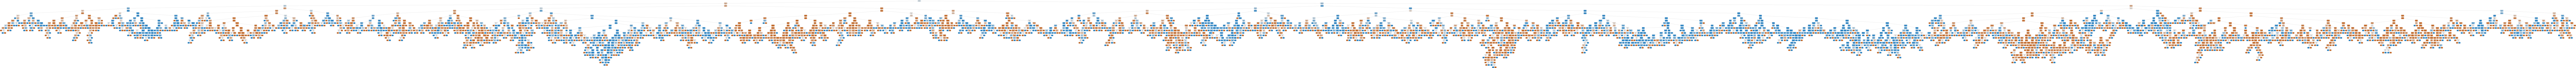

In [480]:
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file

col = ['pk1_HP','pk1_Attack','pk1_Defense','pk1_Sp. Atk','pk1_Sp. Def','pk1_Speed','pk2_HP','pk2_Attack','pk2_Defense','pk2_Sp. Atk','pk2_Sp. Def','pk2_Speed','pk1_Mega','pk1_Legendary','pk2_Mega','pk2_Legendary','pk1_Type 1 num','pk2_Type 1 num','pk1_Type 2 num','pk2_Type 2 num']

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = col,
                class_names = ['1', '2'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')